In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# x_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, train_size=0.70)

In [13]:
"""
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True, --> esto es para que no quede ordenado: A,A,A,A,B,B,B,B,C,C,C,D,D,E,E,E,E,E,E,E....
    random_state=42, --> que hace  esto???
)
"""

'\nX_train, X_test, y_train, y_test = train_test_split(\n    X,\n    y,\n    test_size=0.2,\n    shuffle=True,\n    random_state=42,\n)\n'

## Data Augmentation

In [5]:
# https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873

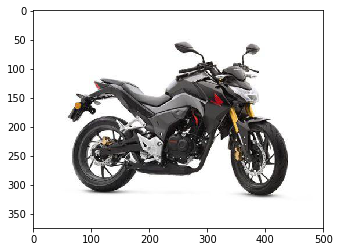

In [2]:
## ABRO IMAGEN
img = Image.open('imagenes/moto_crawler1_1_0.jpg')
img = np.array(img)
plt.imshow(img)
plt.show()

In [3]:
## METRICAS DE LA IMAGEN
print('Image shape as array: %d x %d' % (img.shape[0], img.shape[1]))
print('Number of pixels in the image: %d' % img.size)
print('Range of pixels: [%d, %d]' % (img.min(), img.max()))
print('Average pixel value: %.2f' % img.mean())

Image shape as array: 375 x 500
Number of pixels in the image: 562500
Range of pixels: [0, 255]
Average pixel value: 203.76


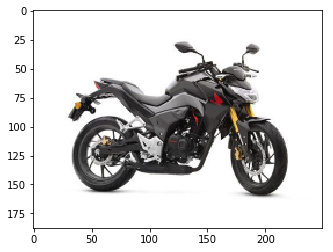

In [4]:
## REZISE DE IMAGEN CON CV2: https://medium.freecodecamp.org/getting-started-with-tesseract-part-ii-f7f9a0899b3f
import cv2
img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
plt.imshow(img)
plt.show()

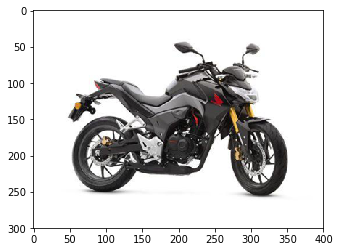

In [5]:
## RESIZE DE IMAGEN CON PILLOW: todas las imagenes deben tener el mismo tamaño
im = Image.open("imagenes/moto_crawler1_1_0.jpg")
out = im.resize((350, 350))
#im.thumbnail((400, 400))
plt.imshow(out)
plt.show()

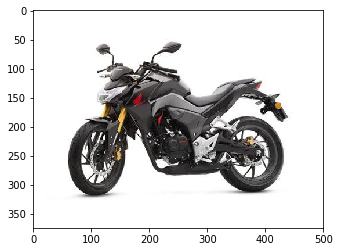

In [4]:
# Flipping images with Numpy
flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.show()

In [ ]:
# tranformar a nmist con 28x28

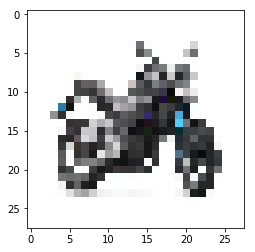

In [3]:
import cv2
img = cv2.imread('imagenes/moto_crawler1_1_0.jpg')
img = cv2.resize(img, (28,28))
plt.imshow(img)
plt.show()

In [5]:
img = img / 255

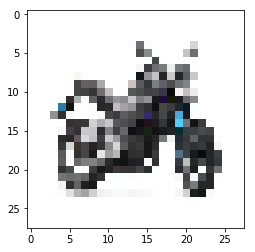

In [6]:
plt.imshow(img)
plt.show()

In [7]:
np.unique(img.ravel())

array([0.02745098, 0.03529412, 0.03921569, 0.04313725, 0.04705882,
       0.05098039, 0.05882353, 0.0627451 , 0.06666667, 0.07058824,
       0.0745098 , 0.07843137, 0.08235294, 0.08627451, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.10980392,
       0.11372549, 0.11764706, 0.12156863, 0.1254902 , 0.12941176,
       0.13333333, 0.1372549 , 0.14117647, 0.14509804, 0.14901961,
       0.15294118, 0.15686275, 0.16078431, 0.16470588, 0.16862745,
       0.17254902, 0.17647059, 0.18039216, 0.18431373, 0.18823529,
       0.19215686, 0.19607843, 0.2       , 0.20392157, 0.20784314,
       0.21176471, 0.21568627, 0.21960784, 0.22352941, 0.22745098,
       0.23137255, 0.23529412, 0.23921569, 0.24313725, 0.24705882,
       0.25098039, 0.25490196, 0.25882353, 0.2627451 , 0.26666667,
       0.27058824, 0.2745098 , 0.27843137, 0.28235294, 0.28627451,
       0.29019608, 0.29411765, 0.29803922, 0.30196078, 0.30588235,
       0.30980392, 0.31372549, 0.31764706, 0.32156863, 0.32549

In [8]:
img.shape

(28, 28, 3)

In [9]:
img.ravel()

array([1., 1., 1., ..., 1., 1., 1.])

## Aplicacion HOG-SVM: reduce cantidad de pixeles

In [ ]:
# https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\skimage\feature\_hog.py:248: skimage_de

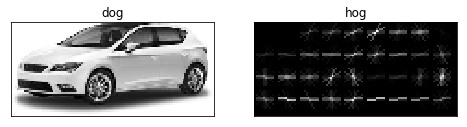

number of pixels:  5610
number of hog features:  768


In [6]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

dog = imread('imagenes/auto.jpg', as_grey=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg

# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(12, 12),
    cells_per_block=(2,2),
    orientations=8,
    visualise=True,
    block_norm='L2-Hys')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]

ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

## Cargamos imagenes y labels

In [14]:
import os

In [15]:
# Definimos rutas de imagenes
root_motos = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/motos'
root_autos = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/auto sedan'
root_aux1 = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/borrame1'
root_aux2 = 'D:/universidad/unpsjb/2018/Sistemas de Soporte para la Toma de Decision/Practica/TP FINAL/imagenes/borrame2'

In [16]:
# Para cada categoria, hacemos el siguiente procedimiento: X=imagen, y=numero de categoria.
labels = ['Autoelevador', 'Auto', 'Buggy', 'Camioneta', 'Camion', 'Colectivo',
         'Cuatriciclo', 'Furgon', 'Moto', 'Pala Cargadora']

In [17]:
X = []
y = []

In [18]:
from skimage import io

## DOS FORMAS DE ABRIR IMAGEN: CON NUMPY y CON SKIMAGE

# FUENTE:
# https://pythonprogramming.net/graphing-images-matplotlib/?completed=/more-pixel-arrays/
# https://stackoverflow.com/questions/34976595/using-train-test-split-with-images-from-my-local-directory?rq=1
# Problema: np.asarray(Image.open(img_path)) ---> ESTO PRODUCE ERROR DE MEMORIA...¿QUE SOLUCION HAY? ¿BASE64?
def cargar_datos_X_Y(ruta_imagen, valor_y):
    for path, subdirs, files in os.walk(ruta_imagen):
        for name in files:
            img_path = os.path.join(path,name)
            #img_pixels = list(Image.open(img_path).getdata())
            #X = np.vstack((X, img_pixels))
            #X.append(img_pixels)
            i = io.imread(img_path)
            #X.append(np.asarray(Image.open(img_path)))
            X.append(np.asarray(i))
            y.append(valor_y)

In [19]:
cargar_datos_X_Y(root_aux1,1)
#cargar_datos_X_Y(root_autos,1)

In [20]:
cargar_datos_X_Y(root_aux2,8)
#cargar_datos_X_Y(root_motos,8)

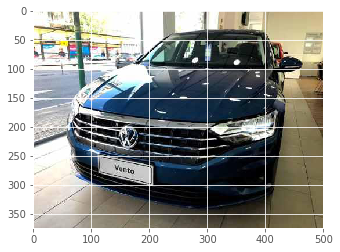

In [48]:
plt.imshow(X[0]) # te muestra la primer imagen
#print(X)
plt.show()

In [ ]:
##### PICLE: https://stackoverflow.com/questions/25104618/pickling-an-image-object

## Dividimos en datos de entrenamiento y datos de prueba

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, train_size=0.70)
print(len(y_train))
print(len(y_test))

7
3


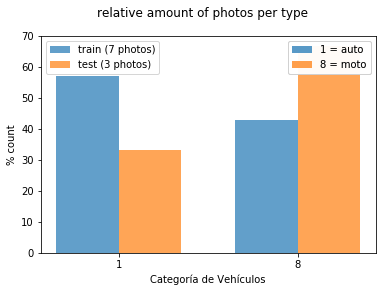

In [37]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5

    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('Categoría de Vehículos')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
legend1 = plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
])
legend2 = plt.legend([
    '1 = auto',
    '8 = moto'
],loc=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

## ¿Estan balanceados los datos? Rta: SI

In [50]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)

[1 8]
[4 3]


## Preprocesamiento

In [ ]:
#normalizamos los datos de entrenamiento y test
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader
from timeit import default_timer as timer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from ast import literal_eval

import scikitplot as skplt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


class_names = np.unique(y_test)

### visualizacion de datos de entrenamiento

# defined labels
labels = ['Autoelevador', 'Auto', 'Buggy', 'Camioneta', 'Camion', 'Colectivo',
         'Cuatriciclo', 'Furgon', 'Moto', 'Pala Cargadora']

# defined colors, i love this one
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']


###### VER: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# APLICAMOS STANDARD_SCALER: Standardize data (0 mean, 1 stdev)
df_copy_images_ = StandardScaler().fit_transform(X_train)
# APLICAMOS NORMALIZACION: Normalize data (length of 1)
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
# APLICAMOS PCA CON 2 COMPONENTES
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

# APLICAMOS MEAN_MAX_SCALER: mezclamos los valores ente 0 y 1
df_copy_images_component = MinMaxScaler().fit_transform(df_copy_images_component)

plt.rcParams["figure.figsize"] = [21, 18]

for k, i in enumerate(class_names):
    plt.scatter(df_copy_images_component[y_train == i, 0],
               df_copy_images_component[y_train == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]),label = labels[k])
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not tuple

## Algoritmo 1: DummyClassifier

In [55]:
### Entrenamos la maquina Dummy ###
from sklearn.dummy import DummyClassifier
from timeit import default_timer as timer

comienzo = timer()

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)

fin = timer() - comienzo
print("Tiempo Entrenamiento Dummy:",fin, " segundos")

Tiempo Entrenamiento Dummy: 0.0004890787686235853  segundos


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

dummy_predict = clf.predict(X_test)

fin = timer() - comienzo
print("Tiempo Test Dummy:",fin, " segundos")
print(dummy_predict)
cnf_matrix = confusion_matrix(y_test, dummy_predict)
print(cnf_matrix)

Tiempo Test Dummy: 1.7483635078829138  segundos
[1 1 1]
[[1 0]
 [2 0]]


## Metricas

In [51]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.rcParams["figure.figsize"] = [8, 5]
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0 1]
 [0 2]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2

   micro avg       0.67      0.67      0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


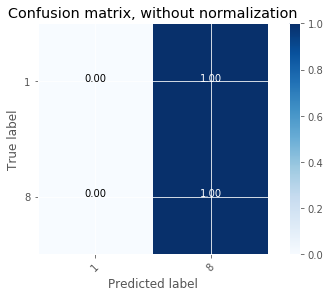

<Figure size 576x360 with 0 Axes>

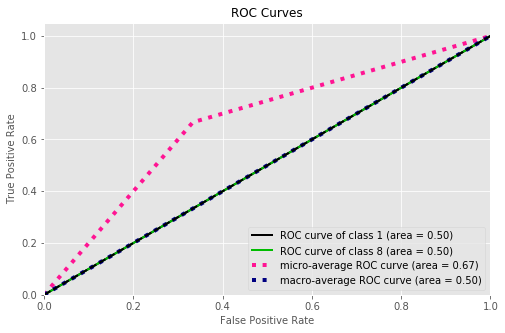

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
import sklearn
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


# Armar confusion matrix
cnf_matrix = confusion_matrix(y_test, dummy_predict)
print(cnf_matrix)
plt.figure()
class_names = np.unique(y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')



# Tabla de metricas automatica
print(classification_report(y_test, dummy_predict))



# Valor de AUC
#y_score = clf.fit(X_train, y_train)
#auc = sklearn.metrics.roc_auc_score(y_test, y_score, average='macro', sample_weight=None, max_fpr=None)
#print(auc)
#fpr, tpr, thresholds = roc_curve(y_test, [1,8]) #auc kernel lineal
#print(auc(fpr, tpr))




# ploteamos roc curve
plt.figure()
skplt.metrics.plot_roc_curve(y_test,clf.predict_proba(X_test))
plt.show()

## Algoritmo 2: Nearest Neighbors Classification¶

## Algoritmo 3: Random Forest Classifier

## Algoritmo 4: SVM

## Algoritmo 5: Red Neuronal

## Prediccion de datos nuevos

In [67]:
# https://machinelearningmastery.com/make-predictions-scikit-learn/
# new instances where we do not know the answer
#Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
Xnew = []
Xnew.append(np.asarray(Image.open('imagenes/moto_crawler1_1_0.jpg')))
ynew = clf.predict(Xnew)
print(ynew) #---> TE DICE A QUE CLASE PERTENECE ........ 

[1]
